# <center> ANÁLISIS EXPLORATORIO DE LOS DATOS

## Introducción <br>
El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares europeos. Este conjunto de datos presenta transacciones ocurridas en dos días, con 492 fraudes de un total de 284.807 transacciones. El conjunto de datos presenta un alto desequilibrio; la clase positiva (fraudes) representa el 0,172 % del total de transacciones.

Contiene únicamente variables numéricas de entrada, resultado de una transformación PCA.

Por motivos de confidencialidad, no se proporcionan las características originales ni información adicional sobre los datos.

- Las características V1, V2, ... V28 son los componentes principales obtenidos con PCA.
- Las únicas características que no se han transformado con PCA son el tiempo y el importe. El tiempo contiene los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos. El importe corresponde al importe de la transacción; esta característica puede utilizarse para el aprendizaje sensible a los costes según el ejemplo.
- La clase de característica es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

In [1]:
# Importación de librerias
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos data
df = pd.read_csv('../data/raw/creditcard.csv', sep = ',')

In [2]:
# Obtenemos dimensiones
df.shape

(284807, 31)

In [3]:
# Info del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Resumen estadistico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Visualizamos primeras 5 filas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Chequeamos nulos
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Como podemos ver, no tenemos que valores nulos dentro de nuestro Dataset.

In [7]:
# Distribución de variable objetivo
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [43]:
# % de desbalanceo
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

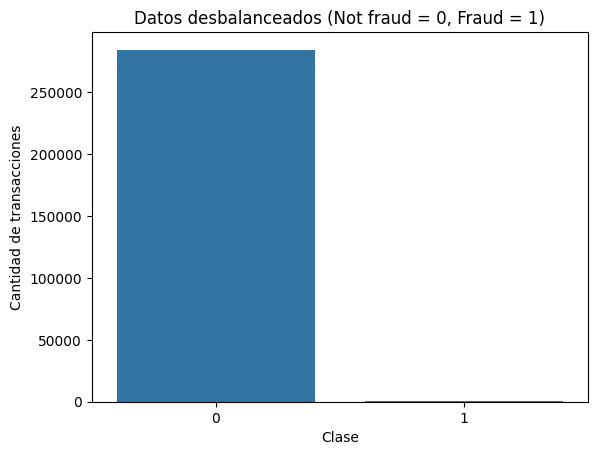

In [8]:
# Countplot variable objetivo
sns.countplot(x=df.Class)
plt.title('Datos desbalanceados (Not fraud = 0, Fraud = 1)')

plt.xlabel('Clase')
plt.ylabel('Cantidad de transacciones')
plt.show()

### IMPORTANTE: <br>
Como se puede observar en el gráfico anterior, enfrentamos un problema de desbalanceo en la columna objetivo, lo cual requiere que implementemos un tratamiento adecuado para abordarlo.

In [22]:
# Obtenemos hora de nuestro dataframe.
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

# Groupby para aplicar funciones de agregación.
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_agg = pd.DataFrame(tmp)
df_agg.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_agg.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


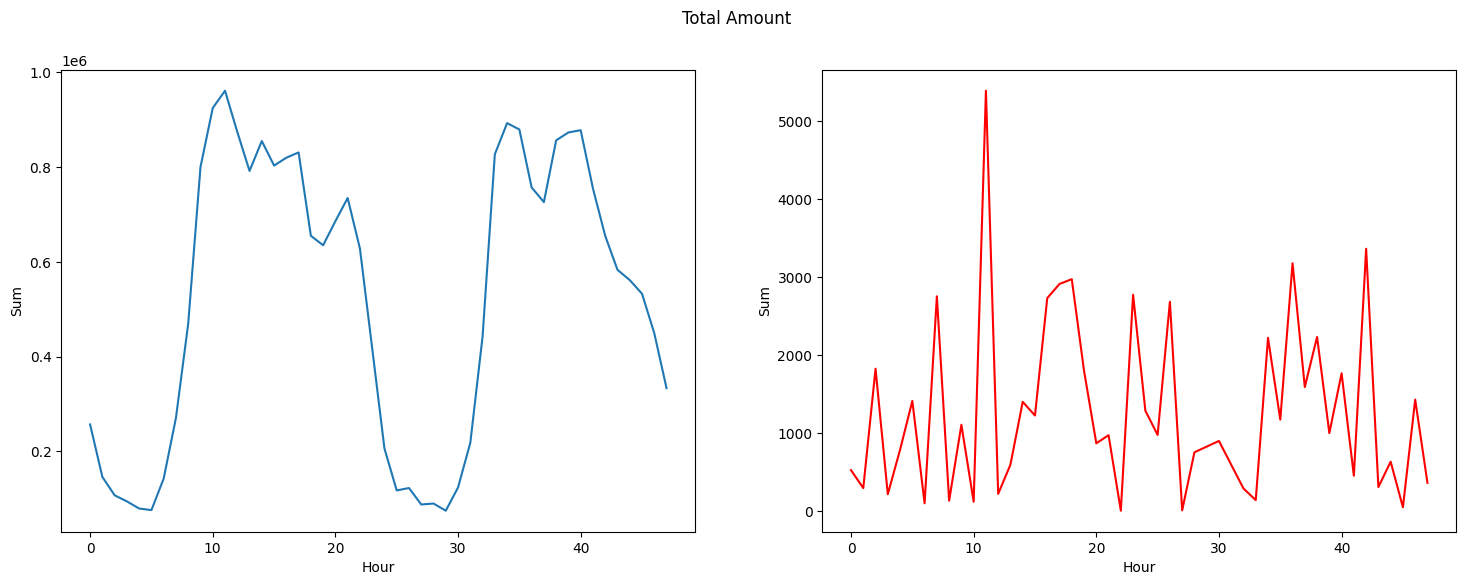

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df_agg.loc[df_agg.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df_agg.loc[df_agg.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show()

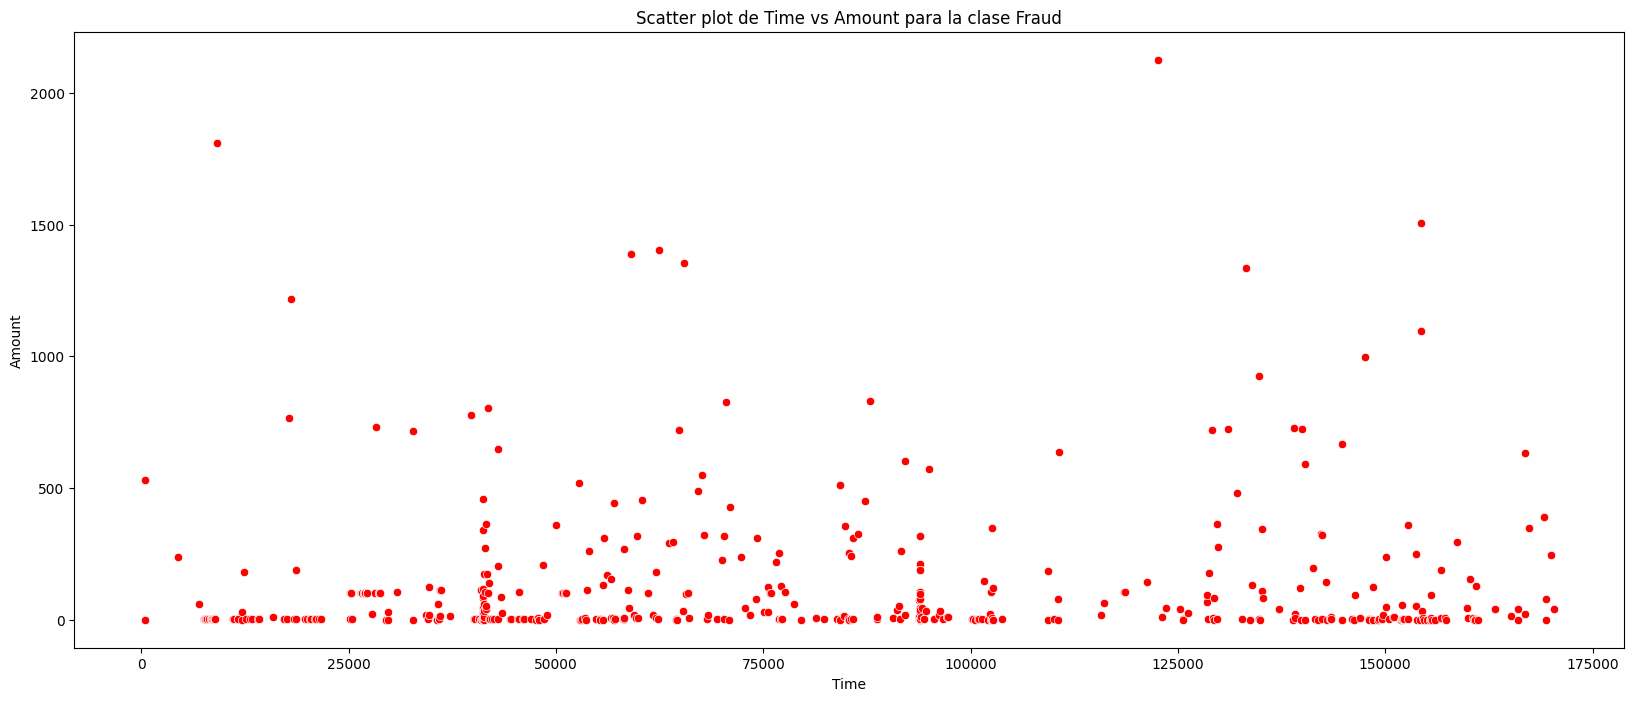

In [33]:
# Grafico que muestra distribución de horarios y montos en los cuales se realizaron las transacciones fraudulentas.

plt.figure(figsize = (20,8))
sns.scatterplot(x= 'Time', y ='Amount', data = df[df['Class'] == 1], color = 'red')
plt.title('Scatter plot de Time vs Amount para la clase Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

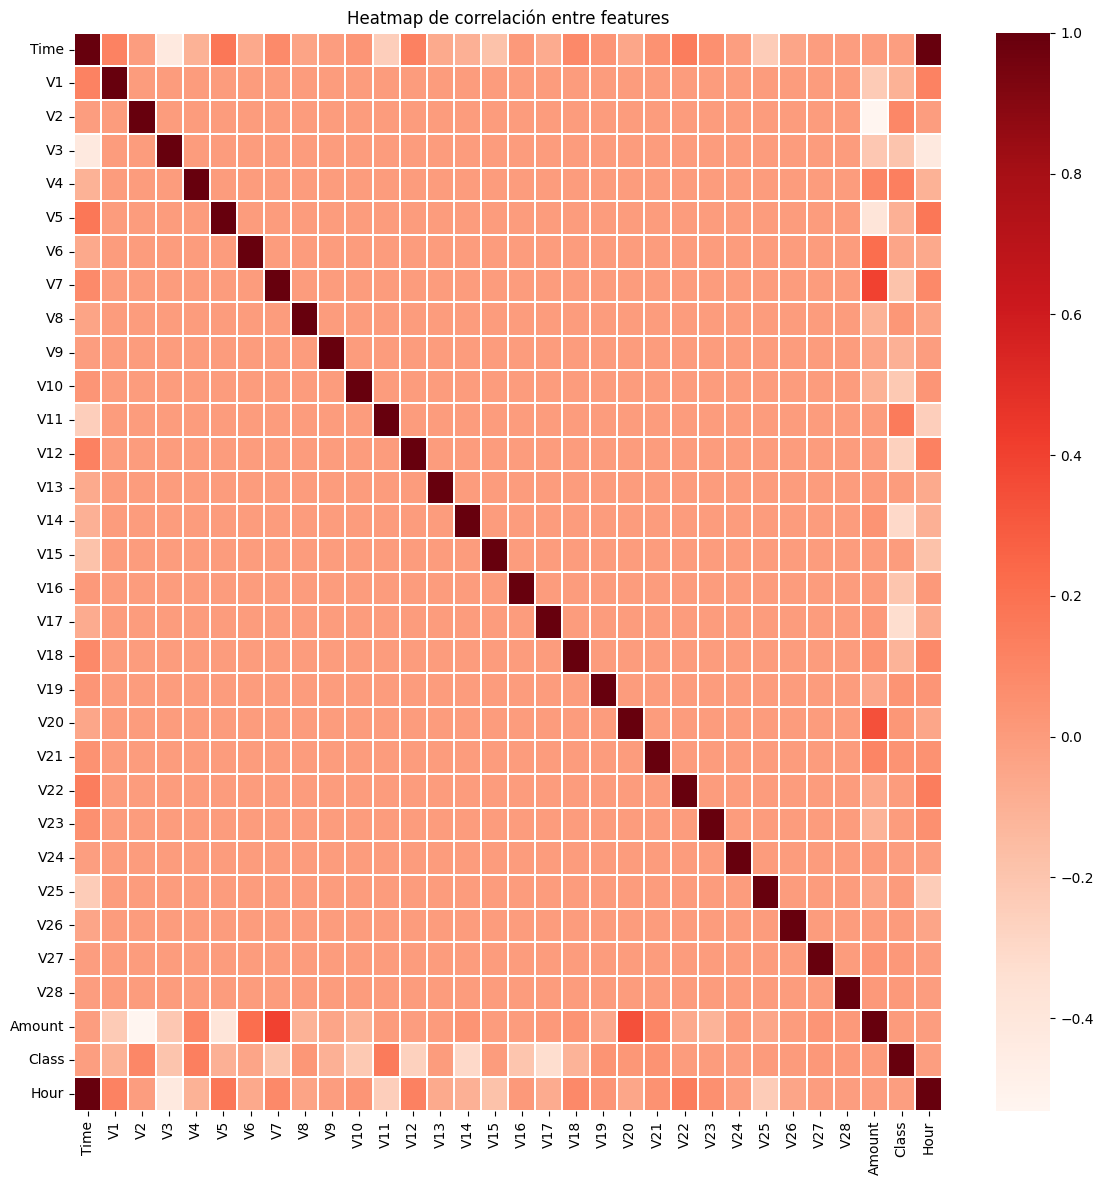

In [41]:
# Heatmap de correlación entre variables
plt.figure(figsize = (14,14))
plt.title('Heatmap de correlación entre features')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [42]:
# Verificamos top de variables mas correlacionadas con 'Class'
# Definir la variable objetivo
variable_objetivo = 'Class'

# Calcular la correlación
correlaciones = df.corr()[variable_objetivo]

# Ordenar las correlaciones en orden descendente
top_correlaciones = correlaciones.abs().sort_values(ascending=False)

# Mostrar las top N variables correlacionadas
top_n = 10  # Cambia este número según lo que necesites
print(top_correlaciones.head(top_n))

Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64
